Epoch 1/10


c:\Users\hubik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.0000e+00 - loss: 19.5914 - val_accuracy: 0.0000e+00 - val_loss: 1.2039
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0000e+00 - loss: 14.8625 - val_accuracy: 0.0000e+00 - val_loss: 3.7029
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2500 - loss: 10.9896 - val_accuracy: 0.0000e+00 - val_loss: 6.2528
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2500 - loss: 8.3927 - val_accuracy: 0.0000e+00 - val_loss: 8.4927
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2500 - loss: 6.0872 - val_accuracy: 0.0000e+00 - val_loss: 10.5878
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5000 - loss: 4.4027 - val_accuracy: 0.0000e+00 - val_loss: 12.6070
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 3.1343 - val_accuracy: 0.0000e+00 - val_loss: 14.5037
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2500 - loss: 1.9894 - val_accu

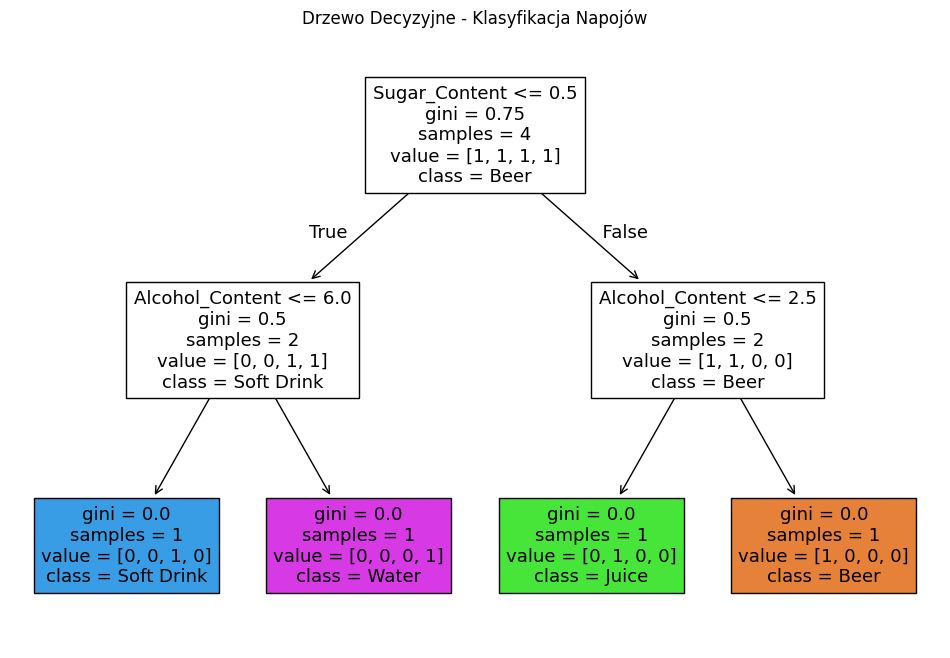

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Nowy napój jest klasyfikowany jako: Water


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt

# Krok 1: Zbierz dane: Przykładowe dane dotyczące napojów.

data = {
    'Name': ['Coke', 'Pepsi', 'Water', 'Orange Juice', 'Beer', 'Wine'],
    'Sugar_Content': [39, 41, 0, 24, 1, 0],  # g na porcję
    'Alcohol_Content': [0, 0, 0, 0, 5, 12],  # % objętościowo
    'Color': [[255, 0, 0], [255, 0, 0], [255, 255, 255], [255, 165, 0], [255, 215, 0], [128, 0, 128]],  # RGB kolory
    'Type': ['Soft Drink', 'Soft Drink', 'Water', 'Juice', 'Beer', 'Wine']
}

# Tworzymy DataFrame
beverages_df = pd.DataFrame(data)

# Przygotowanie danych
label_encoder = LabelEncoder()
beverages_df['Type_encoded'] = label_encoder.fit_transform(beverages_df['Type'])

# Konwersja koloru na tablicę NumPy
color_data = np.array(beverages_df['Color'].tolist())
X_numeric = beverages_df[['Sugar_Content', 'Alcohol_Content']].values

# Łączenie cech numerycznych i kolorów
X = np.hstack((X_numeric, color_data))
y = beverages_df['Type_encoded']

# Podział danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape danych dla CNN (przy założeniu, że kolor jest przetwarzany jako obraz)
X_train_cnn = X_train[:, 2:].reshape(-1, 1, 3, 1)  # Tylko kolory jako dane dla CNN
X_test_cnn = X_test[:, 2:].reshape(-1, 1, 3, 1)

# Model CNN
cnn_model = Sequential([
    Conv2D(32, (1, 1), activation='relu', input_shape=(1, 3, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Trenowanie CNN
cnn_model.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_test_cnn, y_test))

# Ewaluacja CNN
cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)[1]
print("Dokładność modelu CNN:", cnn_accuracy)

# Model drzewa decyzyjnego dla cech numerycznych
numeric_model = DecisionTreeClassifier(random_state=42)
numeric_model.fit(X_train[:, :2], y_train)

# Ewaluacja drzewa decyzyjnego
numeric_accuracy = accuracy_score(y_test, numeric_model.predict(X_test[:, :2]))
print("Dokładność modelu drzewa decyzyjnego:", numeric_accuracy)

# Generowanie schematu drzewa decyzyjnego
plt.figure(figsize=(12, 8))
plot_tree(numeric_model, feature_names=['Sugar_Content', 'Alcohol_Content'], class_names=label_encoder.classes_, filled=True)
plt.title("Drzewo Decyzyjne - Klasyfikacja Napojów")
plt.show()

# Zapis modelu CNN
cnn_model.save('beverage_cnn_classifier.h5')

# Przykład predykcji z CNN
new_color = np.array([[255, 0, 0]]).reshape(-1, 1, 3, 1)  # Nowy napój (np. czerwony kolor)
cnn_prediction = cnn_model.predict(new_color)
predicted_class = label_encoder.inverse_transform([np.argmax(cnn_prediction)])[0]
print("Nowy napój jest klasyfikowany jako:", predicted_class)
